# Projet de simulation numérique - Brusselator
####   Quentin Lalou - Jonathan Magérus

## Brusselator 0D

Nous considérons le système suivant :
$$ \frac{du}{dt} = A + u^2 v - Bu - u$$
$$ \frac{dv}{dt} = Bu - u^2 v$$

### Approche théorique

Tout d'abord, essayons de déterminer les équilibres du système. On a $Bu - u^2v = 0$, et donc, $u = 0$ ou $B = uv$. En réinjectant nos résultat dans $A + u^2v - Bu - u = 0$, on trouve un équilibre au point $p = (A,\frac{B}{A})$. La jacobienne du système au point d'équilibre est égal à :

$$ J(p) = \begin{pmatrix} B - 1 & A^2 \\ -B & -A^2 \end{pmatrix}$$

Les valeurs propres de cette matrice sont égales à $\lambda_{\pm} = \frac{1}{2} ( \pm \sqrt{(A^2 - B + 1)^2 - 4A^2} - A^2 + B -1)$.
On remarque que $Re(\lambda_{\pm}) \leq 0$ pour $B \leq 1 + A^2$. Notre équilibre est donc stable et devient instable pour $B > 1 + A^2$.

### Méthode numérique

Faisons un premier essai de ce système en utilisant simplement la méthode d'euler avant, avec u = v = 0 et A = B = 1 :

In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
def dudt(u,v,A,B) :
    der_u = A + v*u**2 - B*u - u
    return der_u

def dvdt(u,v,A,B) :
    der_v = B*u - v*u**2
    return der_v

def eul_av(A,B,u_0,v_0, t_f, N) :
    h = t_f/N
    u = [u_0]
    v = [v_0]
    t = np.linspace(0,t_f,N+1)
    for i in range(N) :
        u.append(u[-1] + h*dudt(u[-1],v[-1],A,B))
        v.append(v[-1] + h*dvdt(u[-1],v[-1],A,B))
    return u,v,t

Text(0, 0.5, 'composant v')

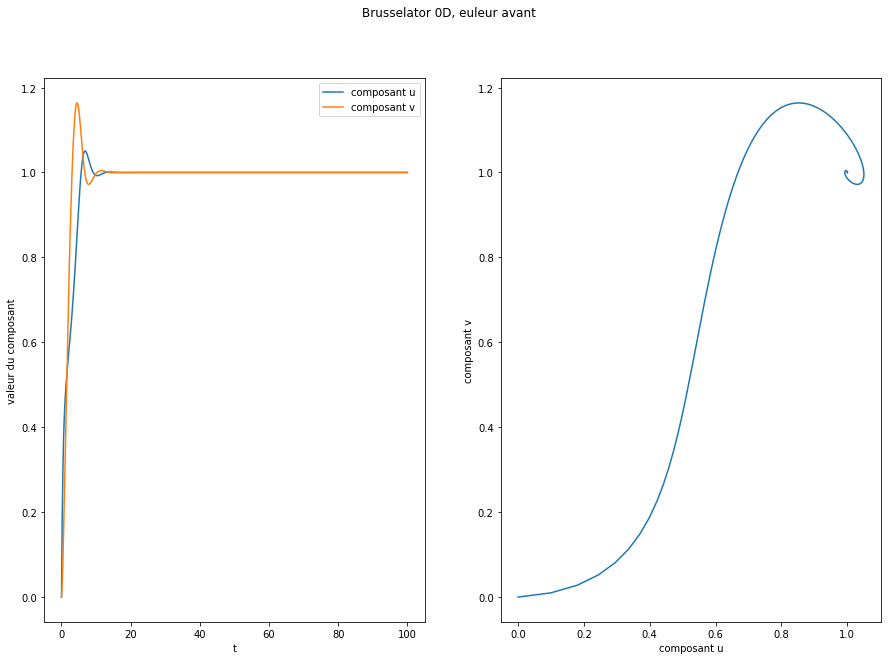

In [28]:
u,v,t = eul_av(1,1,0,0,100,1000)

fig1 = plt.figure(figsize = (15,10))
fig1.suptitle('Brusselator 0D, euleur avant')
ax1 = fig1.add_subplot(121)
ax1.plot(t,u,label = 'composant u')
ax1.plot(t,v,label = 'composant v')
plt.xlabel('t')
plt.ylabel('valeur du composant')
plt.legend()

ax2 = fig1.add_subplot(122)
ax2.plot(u,v)
plt.xlabel('composant u')
plt.ylabel('composant v')

On remarque bien un équilibre stable au point $p = (A,B/A) =(1,1)$. On peut d'ailleurs voir que ce comportement ne dépend pas des conditions initiales sur u et v.

Text(0, 0.5, 'composant v')

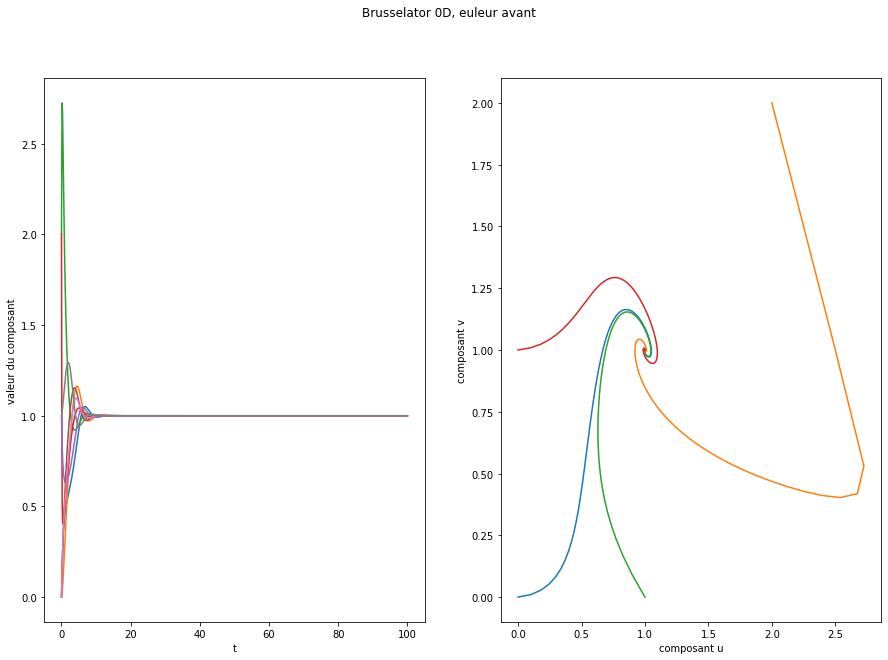

In [29]:
a,b,t = eul_av(1,1,0,0,100,1000)
c,d,t = eul_av(1,1,2,2,100,1000)
e,f,t = eul_av(1,1,1,0,100,1000)
g,h,t = eul_av(1,1,0,1,100,1000)

fig1 = plt.figure(figsize = (15,10))
fig1.suptitle('Brusselator 0D, euleur avant')
ax1 = fig1.add_subplot(121)
ax1.plot(t,a)
ax1.plot(t,b)
ax1.plot(t,c)
ax1.plot(t,d)
ax1.plot(t,e)
ax1.plot(t,f)
ax1.plot(t,g)
ax1.plot(t,h)
plt.xlabel('t')
plt.ylabel('valeur du composant')

ax2 = fig1.add_subplot(122)
ax2.plot(a,b)
ax2.plot(c,d)
ax2.plot(e,f)
ax2.plot(g,h)
plt.xlabel('composant u')
plt.ylabel('composant v')

Essayons maintenant en posant B = 3. Comparons cette fois-ci la méthode d'euler ainsi que celle de Runge-Kutta.

In [30]:
def rk4(A,B,u_0,v_0, t_f, N) :
    h = t_f/N
    u = [u_0]
    v = [v_0]
    t = np.linspace(0,t_f,N+1)
    for i in range(N) :
        k1 = h*dudt(u[-1],v[-1],A,B)
        j1 = h*dvdt(u[-1],v[-1],A,B)
        k2 = h*dudt(u[-1] + k1/2,v[-1] + j1/2,A,B)
        j2 = h*dvdt(u[-1] + k1/2,v[-1] + j1/2,A,B)
        k3 = h*dudt(u[-1] + k2/2,v[-1] + j2/2,A,B)
        j3 = h*dvdt(u[-1] + k2/2,v[-1] + j2/2,A,B)
        k4 = h*dudt(u[-1] + k3,v[-1] + j3,A,B)
        j4 = h*dvdt(u[-1] + k3,v[-1] + j3,A,B)
        u.append(u[-1] + (k1 + 2*k2 + 2*k3 + k4)/6)
        v.append(v[-1] + (j1 + 2*j2 + 2*j3 + j4)/6)
    return u,v,t

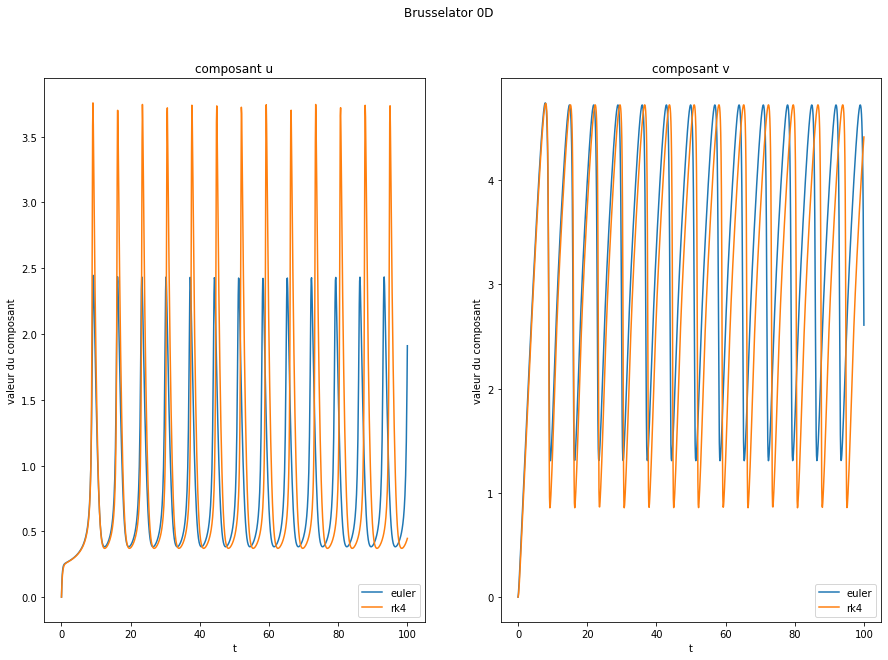

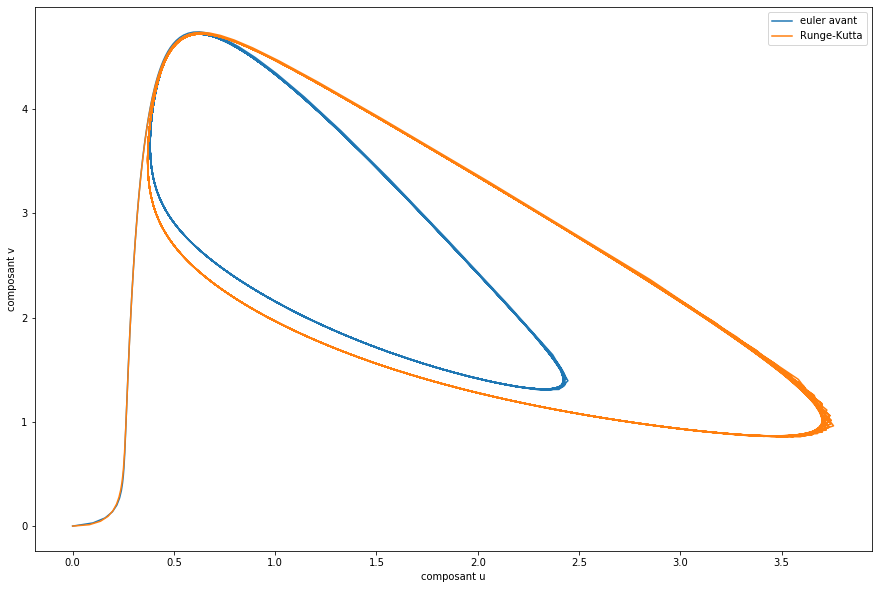

In [31]:
a,b,t = eul_av(1,3,0,0,100,1000)
c,d,t = rk4(1,3,0,0,100,1000)

fig1 = plt.figure(figsize = (15,10))
fig1.suptitle('Brusselator 0D')
ax1 = fig1.add_subplot(121)
ax1.set_title('composant u')
ax1.plot(t,a,label = 'euler')
ax1.plot(t,c,label = 'rk4')
plt.xlabel('t')
plt.ylabel('valeur du composant')
plt.legend()

ax2 = fig1.add_subplot(122)
ax2.set_title('composant v')
ax2.plot(t,b,label = 'euler')
ax2.plot(t,d,label = 'rk4')
plt.xlabel('t')
plt.ylabel('valeur du composant')
plt.legend()

fig2 = plt.figure(figsize = (15,10))
ax3 = fig2.add_subplot(111)
ax3.plot(a,b, label = 'euler avant')
ax3.plot(c,d, label = 'Runge-Kutta')
plt.xlabel('composant u')
plt.ylabel('composant v')
plt.legend()

On voit que les 2 méthodes donnent des résultats radicalement différents. En réalité, la méthode d'euler a tendance à sous évaluer les valeurs réelles, nous allons donc utiliser à présent la méthode de Runge-Kutta. On remarque que le système aborde un comportement ondulatoire. En fait, $u$ agit comme un catalyseur au composant $v$ et inversément. Sauf que lorque les composants atteignent des valeurs trop hautes, elles s'annihilent. Avec un $B > 2$, l'interaction entre les deux composants est si forte qu'elle provoque cette oscillation. Observons maintenant le système en faisant varier B et observons le système :

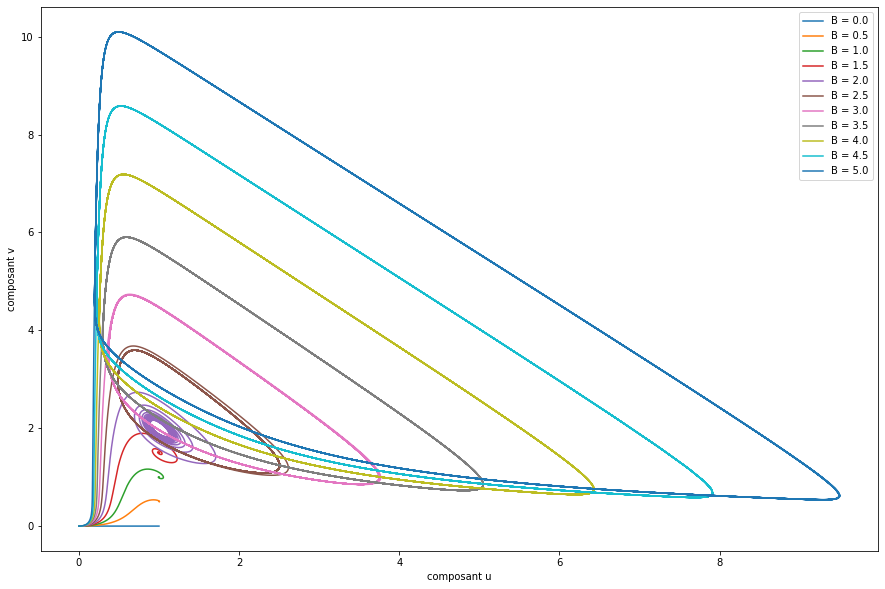

In [32]:
plt.figure(figsize = (15,10))
for i in range(11) :
    u,v,t = rk4(1,i/2,0,0,100,10000)
    ind = 'i'
    plt.plot(u,v, label = 'B = {}'.format(i/2))

plt.xlabel('composant u')
plt.ylabel('composant v')
plt.legend()

Le système bifurque vers un système cyclique. Il s'agit donc d'une bifurcation de hopf.

## Brusselator 1D

### Théorie

Nous considérons le système suivant :
$$ \frac{du}{dt} = A + u^2 v - Bu - u + D_u \nabla^2 u$$
$$ \frac{dv}{dt} = Bu - u^2 v + D_v\nabla^2 v$$
avec $D_v = 10$.

Il nous faut adapter la méthode 1-SBDF, à savoir
$$ \frac{W_{i+1} - W_i}{k} = F(W_i) + D\nabla^2 W_{i+1}$$
de tel sorte qu'elle soit de l'odre $O(k) + O(h^2)$. Le terme de gauche est déjà d'ordre k, il nous faut établir le terme d'ordre h². Pour cela, nous allons exprimer la dérivée seconde comme ceci :
$$\frac{\partial^2}{\partial x^2}u(x_i,t) = \frac{u(x_{i+1},t) - 2u(x_i,t) + u(x_{i-1},t)}{h^2} + O(h^2) $$
avec $x_i = ih$. Et donc, on aurait pour u
$$ \frac{u(x_{i},t+k) - u(x_i,t)}{k} = F(u(x_i,t) + D_u\frac{u(x_{i+1},t+k) - 2u(x_i,t+k) + u(x_{i-1},t+k)}{h^2}$$
$$ u(x_{i},t+k) - \frac{D_u k}{h^2} \big ( u(x_{i+1},t+k) - 2u(x_i,t+k) + u(x_{i-1},t+k) \big ) = u(x_i,t) + kF(u(x_i,t)$$
$$ \big ( 1 + 2\frac{D_uk}{h^2}\big ) u(x_{i},t+k) - \frac{D_u k}{h^2}u(x_{i+1},t+k) - \frac{D_u k}{h^2}u(x_{i-1},t+k) = u(x_i,t) + kF(u(x_i,t) $$
avec $F(u) = A + u^2v - Bu - u$. On aura donc un système linéaire avec une matrice tridiagonale. Comme nous avons comme conditions aux bords $\frac{\partial}{\partial x} u(0,t) = \frac{\partial}{\partial x} u(L,t) = 0$, on adapte notre système de telle sorte que $u(0,t) - u(x_1,t) = u(L,t) - u(x_{-1},t) = 0$, avec $L=50$.

### Code

Le code est présent dans Brusselator_1D.py, mais il s'agit d'une animation. Comme notebook a du mal à faire tourner des animations sans add-on, on montrera des graphes à différent temps.

In [33]:
import random as rd

In [34]:
#définition des fonctions F, vu que c'est les mêmes que sur brusselator 0D, on garde la même notation

def dudt(u,v,A,B) :
    der_u = A + v*u**2 - B*u - u
    return der_u

def dvdt(u,v,A,B) :
    der_v = B*u - v*u**2
    return der_v

In [44]:
#définition des paramètres
h = 1
k = 0.01
D_v = 10
N = int(50/h) + 1
time = 15
T = int(time/k)

#discrétisation, ce sera utile pour les plots
x = np.linspace(0,50,N)

In [45]:
#création des conditions initiales
u = np.zeros((N,T+1))
v = np.zeros((N,T+1))
for i in range(N) :
    u[i,0] = rd.uniform(0,5)
    v[i,0] = rd.uniform(0,5)
u[0,0] = u[1,0]
u[-1,0] = u[-2,0]
v[0,0] = v[1,0]
v[-1,0] = v[-2,0]

Observons le système lorsqu'on impose comme paramètres $A=1$, $B=1.3$, $D_u=0.1$.

In [71]:
A = 1
B = 1.3
D_u = 0.1

In [72]:
cst_u = D_u*k/h**2
cst_v = D_v*k/h**2

A_u = (1+2*cst_u)*np.eye(N) - cst_u*np.eye(N,k=-1) - cst_u*np.eye(N,k=1)
A_v = (1+2*cst_v)*np.eye(N,N) - cst_v*np.eye(N,k=-1) - cst_v*np.eye(N,k=1)
A_u[0,0],A_u[0,1],A_u[-1,-1],A_u[-1,-2] = 1,-1,1,-1
A_v[0,0],A_v[0,1],A_v[-1,-1],A_v[-1,-2] = 1,-1,1,-1

for i in range(T) :
    #création du vecteur pour la résolution du système linéaire à venir
    u_ = u[:,i]
    v_ = v[:,i]
    B_u = u_ + k*(A + v_*u_**2 - B*u_ - u_)
    B_v = v_ + k*(B*u_ - v_*u_**2)
    
    #modification pour respecter les conditions aux bords
    B_u[0],B_u[-1],B_v[0],B_v[-1] = 0,0,0,0 
    
    #résolution du système linéaire
    u[:,i+1] = np.linalg.solve(A_u,B_u)
    v[:,i+1] = np.linalg.solve(A_v,B_v)

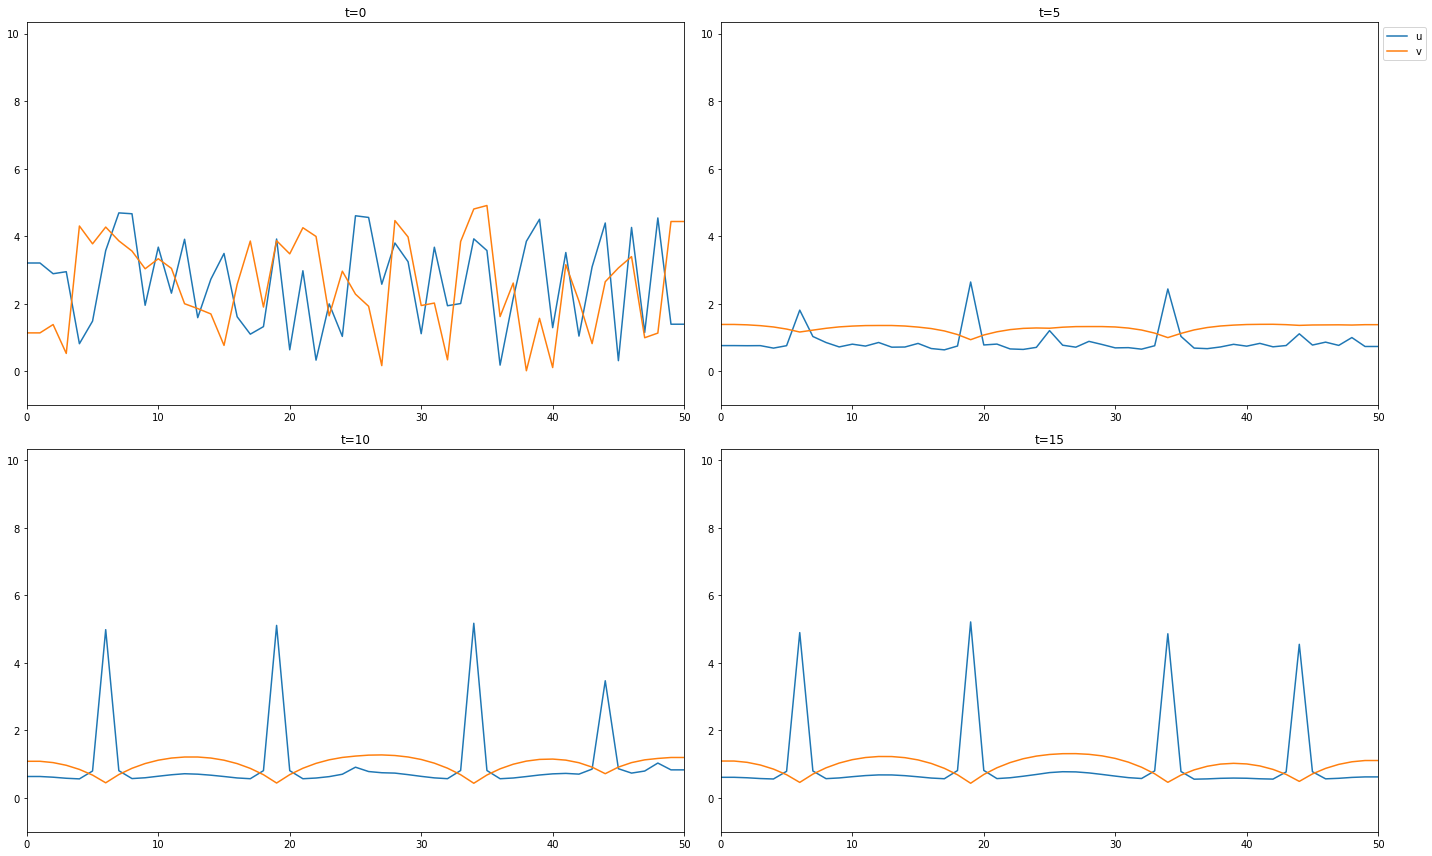

In [73]:
fig1 = plt.figure(figsize=(20,12))
ax0 = plt.subplot(221)
ax0.set_title("t=0")
ax0.set_xlim(0,50)
line1, = plt.plot(x,u[:,0], label = 'u')
line2, = plt.plot(x,v[:,0], label = 'v')

ax1 = plt.subplot(222)
ax1.set_title("t=5")
ax1.set_xlim(0,50)
line1, = plt.plot(x,u[:,int(5/k)], label = 'u')
line2, = plt.plot(x,v[:,int(5/k)], label = 'v')
plt.legend(bbox_to_anchor=(1.0001, 1),loc='upper left')

ax2 = plt.subplot(223)
ax2.set_title("t=10")
ax2.set_xlim(0,50)
line1, = plt.plot(x,u[:,int(10/k)], label = 'u')
line2, = plt.plot(x,v[:,int(10/k)], label = 'v')

ax3 = plt.subplot(224)
ax3.set_title("t=15")
ax3.set_xlim(0,50)
line1, = plt.plot(x,u[:,int(15/k)], label = 'u')
line2, = plt.plot(x,v[:,int(15/k)], label = 'v')

if u.max() > v.max() :
    ax0.set_ylim(-1,u.max()+1)
    ax1.set_ylim(-1,u.max()+1)
    ax2.set_ylim(-1,u.max()+1)
    ax3.set_ylim(-1,u.max()+1)
else :
    ax0.set_ylim(-1,v.max()+1)
    ax1.set_ylim(-1,v.max()+1)
    ax2.set_ylim(-1,v.max()+1)
    ax3.set_ylim(-1,v.max()+1)

fig1.tight_layout()
plt.show()

Observons le système plus généralement en fonction du temps.

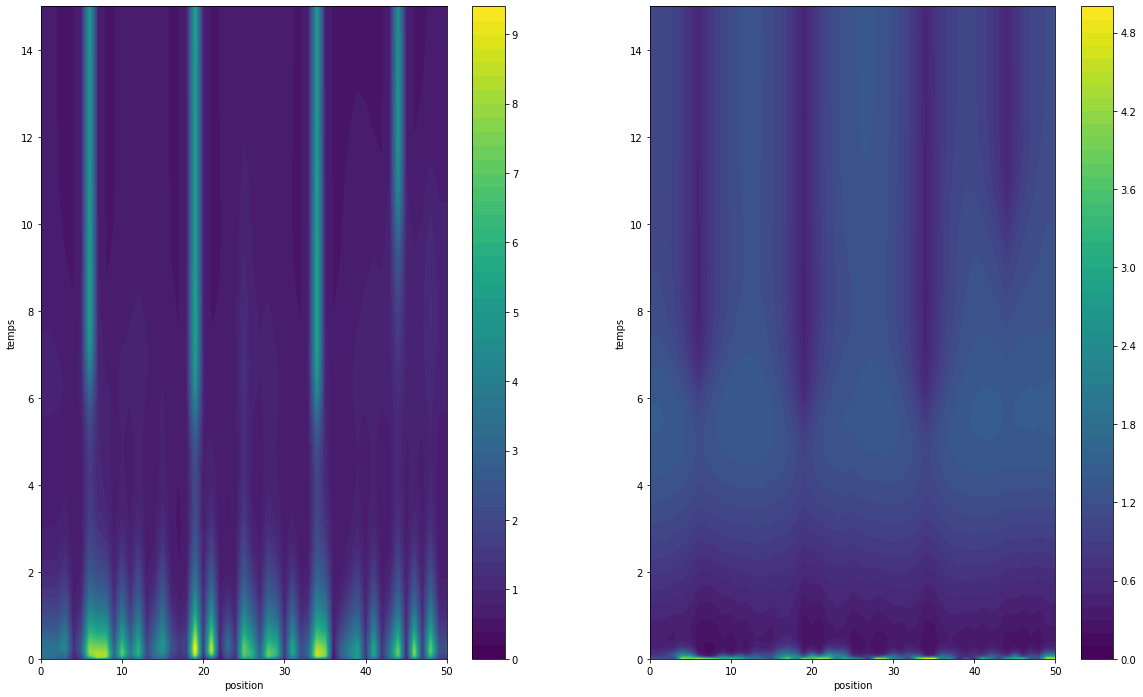

In [74]:
fig1_2 = plt.figure(figsize=(20,12))
[xx,tt] = np.meshgrid(x,np.linspace(0,time,T+1))
ax1 = plt.subplot(121)
ax1.set_xlabel("position")
ax1.set_ylabel("temps")
graphe_1 = plt.contourf(xx,tt,np.transpose(u),50)
fig1_2.colorbar(graphe_1,ax=ax1)
ax2 = plt.subplot(122)
ax2.set_xlabel("position")
ax2.set_ylabel("temps")
graphe_2 = plt.contourf(xx,tt,np.transpose(v),50)
fig1_2.colorbar(graphe_2,ax=ax2)
plt.show()

Le système atteind un équilibre après quelques secondes. On remarque plusieurs structures en forme de pics pour $v$ séparés par des intervales où $u$ adopte une structure courbée. En réalité, le facteur $D_u$ (qui représente en quelque sorte la dilution de $u$) est si faible qu'il permet au composant $v$ de maintenir une grande valeur et de maintenir $u$ assez bas pour ne pas s'annihiler.

Maintanant, avec les paramètres $A=1$, $B=3$, $D_u=10$.

In [75]:
A = 1
B = 3
D_u = 10

In [76]:
cst_u = D_u*k/h**2
cst_v = D_v*k/h**2

A_u = (1+2*cst_u)*np.eye(N) - cst_u*np.eye(N,k=-1) - cst_u*np.eye(N,k=1)
A_v = (1+2*cst_v)*np.eye(N,N) - cst_v*np.eye(N,k=-1) - cst_v*np.eye(N,k=1)
A_u[0,0],A_u[0,1],A_u[-1,-1],A_u[-1,-2] = 1,-1,1,-1
A_v[0,0],A_v[0,1],A_v[-1,-1],A_v[-1,-2] = 1,-1,1,-1

for i in range(T) :
    #création du vecteur pour la résolution du système linéaire à venir
    u_ = u[:,i]
    v_ = v[:,i]
    B_u = u_ + k*(A + v_*u_**2 - B*u_ - u_)
    B_v = v_ + k*(B*u_ - v_*u_**2)
    
    #modification pour respecter les conditions aux bords
    B_u[0],B_u[-1],B_v[0],B_v[-1] = 0,0,0,0 
    
    #résolution du système linéaire
    u[:,i+1] = np.linalg.solve(A_u,B_u)
    v[:,i+1] = np.linalg.solve(A_v,B_v)

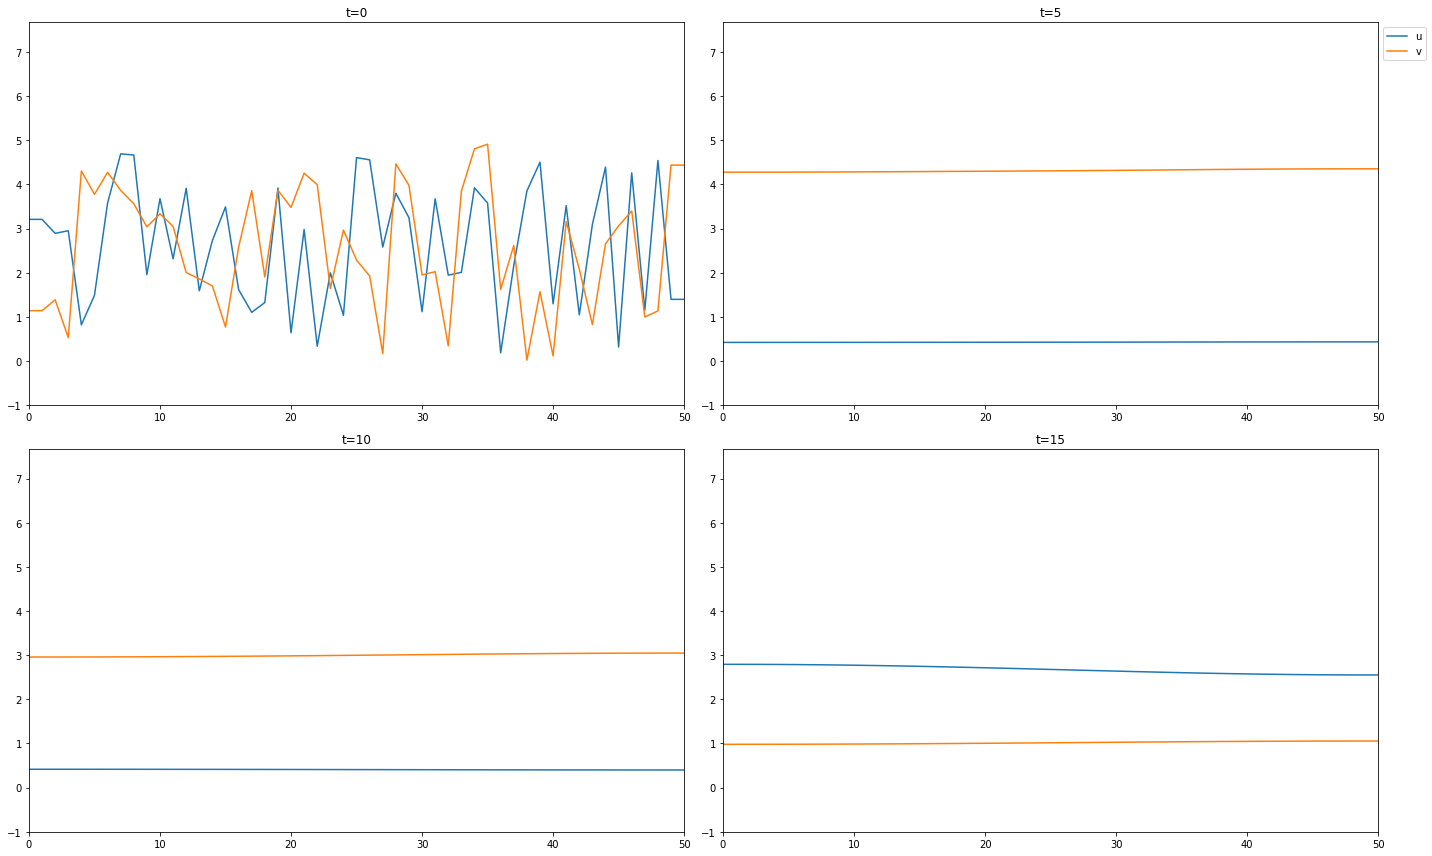

In [77]:
fig2 = plt.figure(figsize=(20,12))
ax0 = plt.subplot(221)
ax0.set_title("t=0")
ax0.set_xlim(0,50)
line1, = plt.plot(x,u[:,0], label = 'u')
line2, = plt.plot(x,v[:,0], label = 'v')

ax1 = plt.subplot(222)
ax1.set_title("t=5")
ax1.set_xlim(0,50)
line1, = plt.plot(x,u[:,int(5/k)], label = 'u')
line2, = plt.plot(x,v[:,int(5/k)], label = 'v')
plt.legend(bbox_to_anchor=(1.0001, 1),loc='upper left')

ax2 = plt.subplot(223)
ax2.set_title("t=10")
ax2.set_xlim(0,50)
line1, = plt.plot(x,u[:,int(10/k)], label = 'u')
line2, = plt.plot(x,v[:,int(10/k)], label = 'v')

ax3 = plt.subplot(224)
ax3.set_title("t=15")
ax3.set_xlim(0,50)
line1, = plt.plot(x,u[:,int(15/k)], label = 'u')
line2, = plt.plot(x,v[:,int(15/k)], label = 'v')

if u.max() > v.max() :
    ax0.set_ylim(-1,u.max()+1)
    ax1.set_ylim(-1,u.max()+1)
    ax2.set_ylim(-1,u.max()+1)
    ax3.set_ylim(-1,u.max()+1)
else :
    ax0.set_ylim(-1,v.max()+1)
    ax1.set_ylim(-1,v.max()+1)
    ax2.set_ylim(-1,v.max()+1)
    ax3.set_ylim(-1,v.max()+1)

fig2.tight_layout()
plt.show()

Il est intéressant maintenant d'observer le système sur un segment au cours du temps.

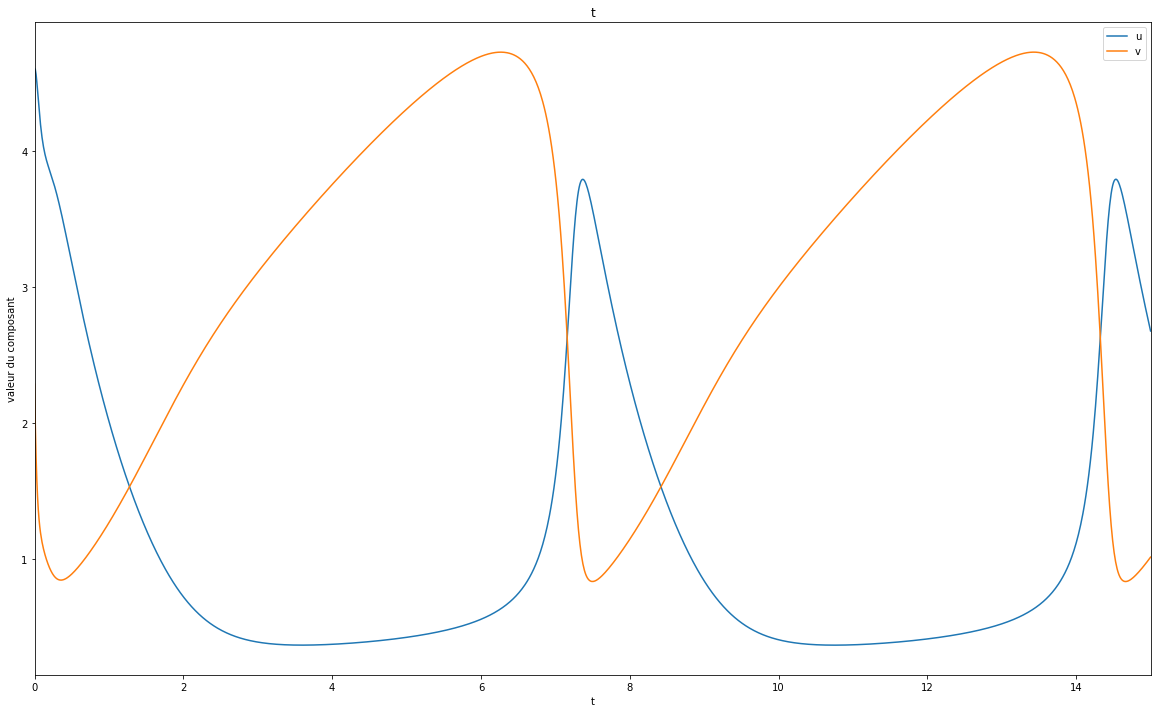

In [78]:
fig2_2 = plt.figure(figsize=(20,12))
ax0 = plt.subplot(111)
ax0.set_title("t")
ax0.set_xlim(0,time)
t = np.linspace(0,time,T+1)
line1, = plt.plot(t,u[25,:], label = 'u')
line2, = plt.plot(t,v[25,:], label = 'v')
plt.xlabel('t')
plt.ylabel('valeur du composant')
plt.legend()
plt.show()

Et observons le système général en fonction du temps.

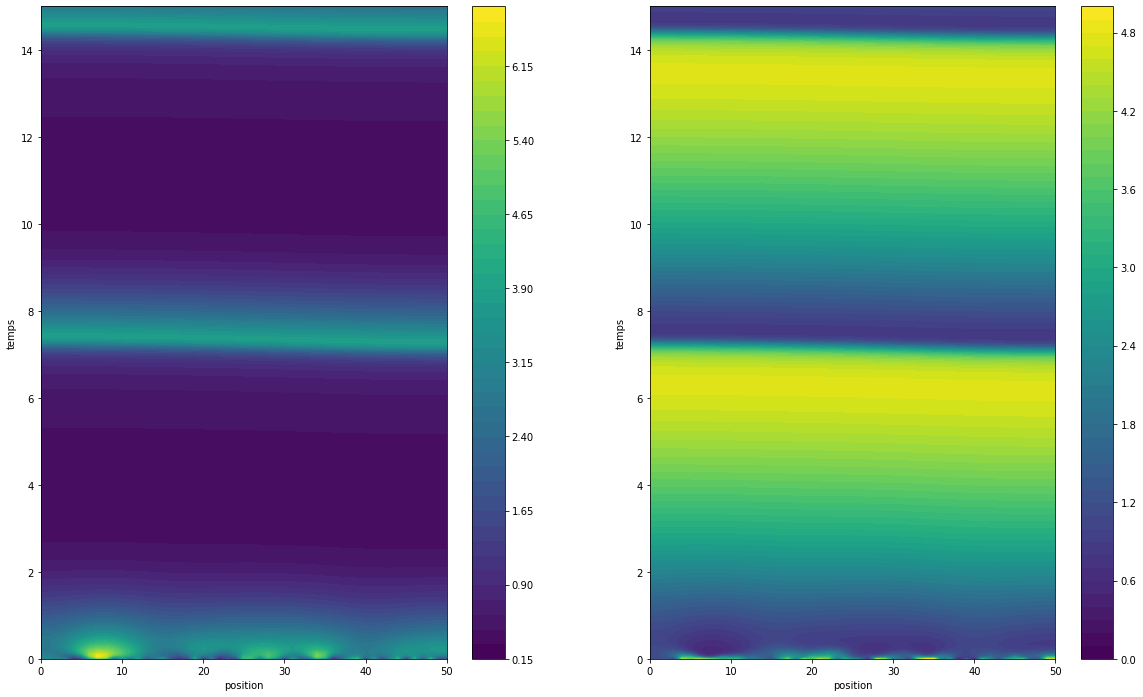

In [79]:
fig2_3 = plt.figure(figsize=(20,12))
[xx,tt] = np.meshgrid(x,np.linspace(0,time,T+1))
ax1 = plt.subplot(121)
ax1.set_xlabel("position")
ax1.set_ylabel("temps")
graphe_1 = plt.contourf(xx,tt,np.transpose(u),50)
fig2_3.colorbar(graphe_1, ax=ax1)
ax2 = plt.subplot(122)
ax2.set_xlabel("position")
ax2.set_ylabel("temps")
graphe_2 = plt.contourf(xx,tt,np.transpose(v),50)
fig2_3.colorbar(graphe_2, ax=ax2)
plt.show()

Le système aborde un comportement ondulatoire assez simlaire au cas en 0D. Néanmoins, l'oscillation est clairement plus lente.

Enfin, avec $A=1$, $B=1.3$, $D_u=10$.

In [84]:
A = 1
B = 1.3
D_u = 10

In [85]:
cst_u = D_u*k/h**2
cst_v = D_v*k/h**2

A_u = (1+2*cst_u)*np.eye(N) - cst_u*np.eye(N,k=-1) - cst_u*np.eye(N,k=1)
A_v = (1+2*cst_v)*np.eye(N,N) - cst_v*np.eye(N,k=-1) - cst_v*np.eye(N,k=1)
A_u[0,0],A_u[0,1],A_u[-1,-1],A_u[-1,-2] = 1,-1,1,-1
A_v[0,0],A_v[0,1],A_v[-1,-1],A_v[-1,-2] = 1,-1,1,-1

for i in range(T) :
    #création du vecteur pour la résolution du système linéaire à venir
    u_ = u[:,i]
    v_ = v[:,i]
    B_u = u_ + k*(A + v_*u_**2 - B*u_ - u_)
    B_v = v_ + k*(B*u_ - v_*u_**2)
    
    #modification pour respecter les conditions aux bords
    B_u[0],B_u[-1],B_v[0],B_v[-1] = 0,0,0,0 
    
    #résolution du système linéaire
    u[:,i+1] = np.linalg.solve(A_u,B_u)
    v[:,i+1] = np.linalg.solve(A_v,B_v)

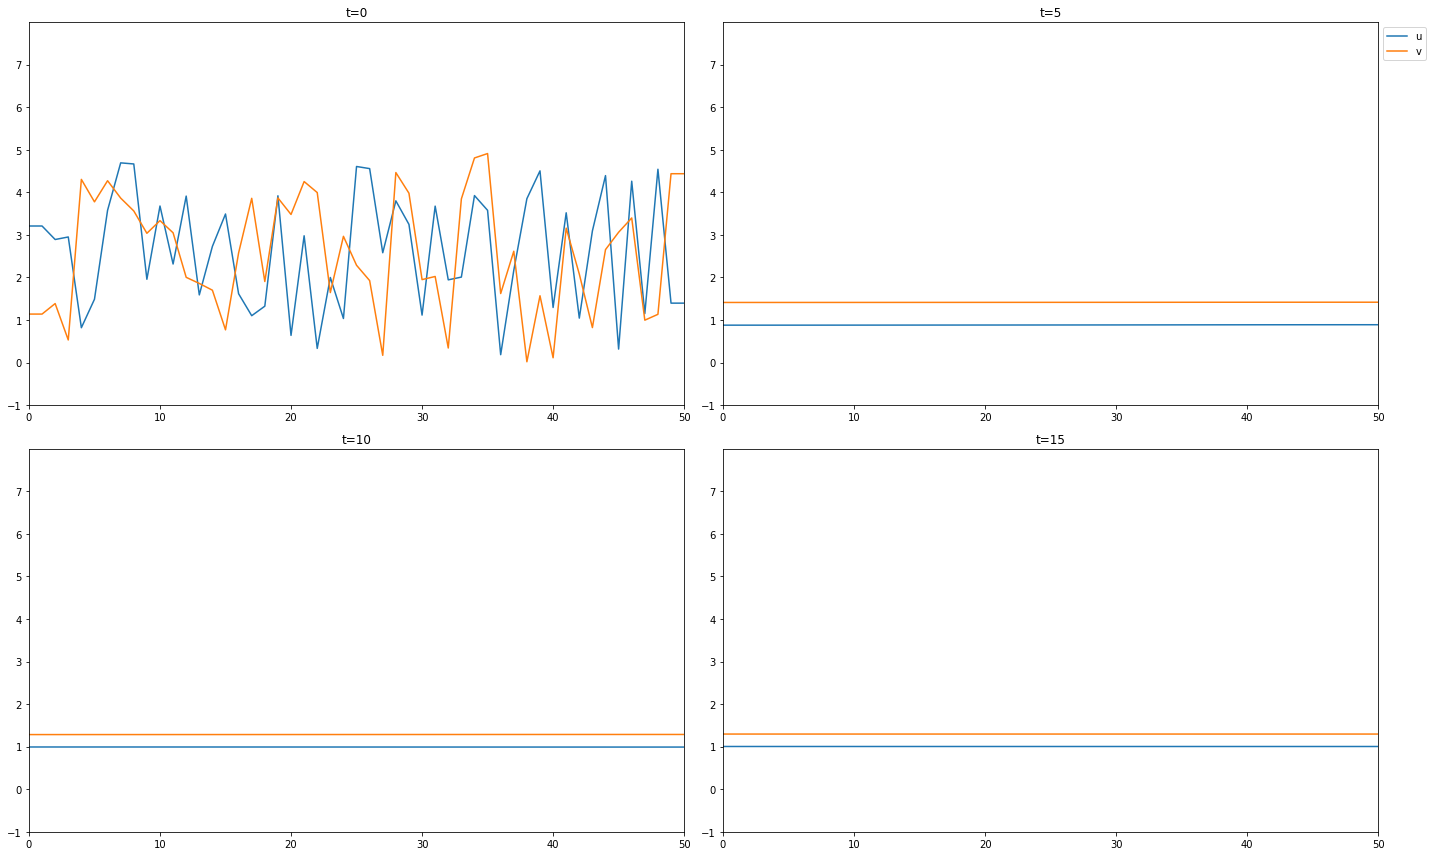

In [86]:
fig3 = plt.figure(figsize=(20,12))
ax0 = plt.subplot(221)
ax0.set_title("t=0")
ax0.set_xlim(0,50)
line1, = plt.plot(x,u[:,0], label = 'u')
line2, = plt.plot(x,v[:,0], label = 'v')

ax1 = plt.subplot(222)
ax1.set_title("t=5")
ax1.set_xlim(0,50)
line1, = plt.plot(x,u[:,int(5/k)], label = 'u')
line2, = plt.plot(x,v[:,int(5/k)], label = 'v')
plt.legend(bbox_to_anchor=(1.0001, 1),loc='upper left')

ax2 = plt.subplot(223)
ax2.set_title("t=10")
ax2.set_xlim(0,50)
line1, = plt.plot(x,u[:,int(10/k)], label = 'u')
line2, = plt.plot(x,v[:,int(10/k)], label = 'v')

ax3 = plt.subplot(224)
ax3.set_title("t=15")
ax3.set_xlim(0,50)
line1, = plt.plot(x,u[:,int(15/k)], label = 'u')
line2, = plt.plot(x,v[:,int(15/k)], label = 'v')

if u.max() > v.max() :
    ax0.set_ylim(-1,u.max()+1)
    ax1.set_ylim(-1,u.max()+1)
    ax2.set_ylim(-1,u.max()+1)
    ax3.set_ylim(-1,u.max()+1)
else :
    ax0.set_ylim(-1,v.max()+1)
    ax1.set_ylim(-1,v.max()+1)
    ax2.set_ylim(-1,v.max()+1)
    ax3.set_ylim(-1,v.max()+1)

fig3.tight_layout()
plt.show()

Observons à nouveau l'évolution du système sur un segment.

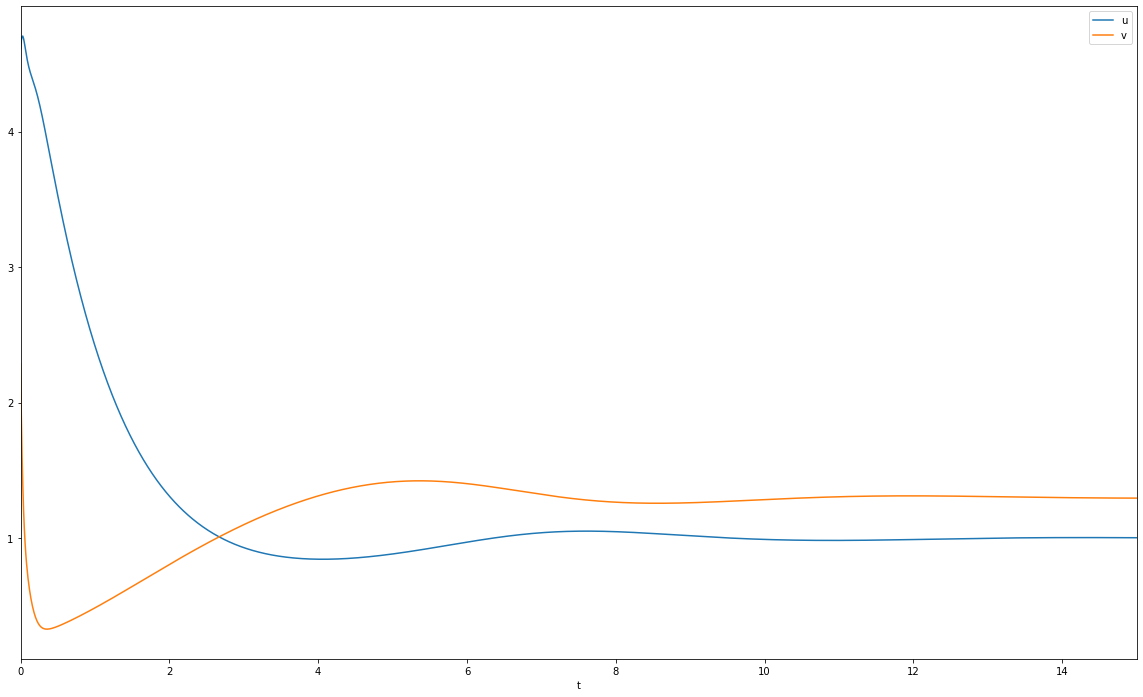

In [87]:
fig3_2 = plt.figure(figsize=(20,12))
ax0 = plt.subplot(111)
ax0.set_xlabel("t")
ax0.set_xlim(0,time)
t = np.linspace(0,time,T+1)
line1, = plt.plot(t,u[25,:], label = 'u')
line2, = plt.plot(t,v[25,:], label = 'v')
plt.legend()
plt.show()

Et observons l'entièreté du système en fonction du temps.

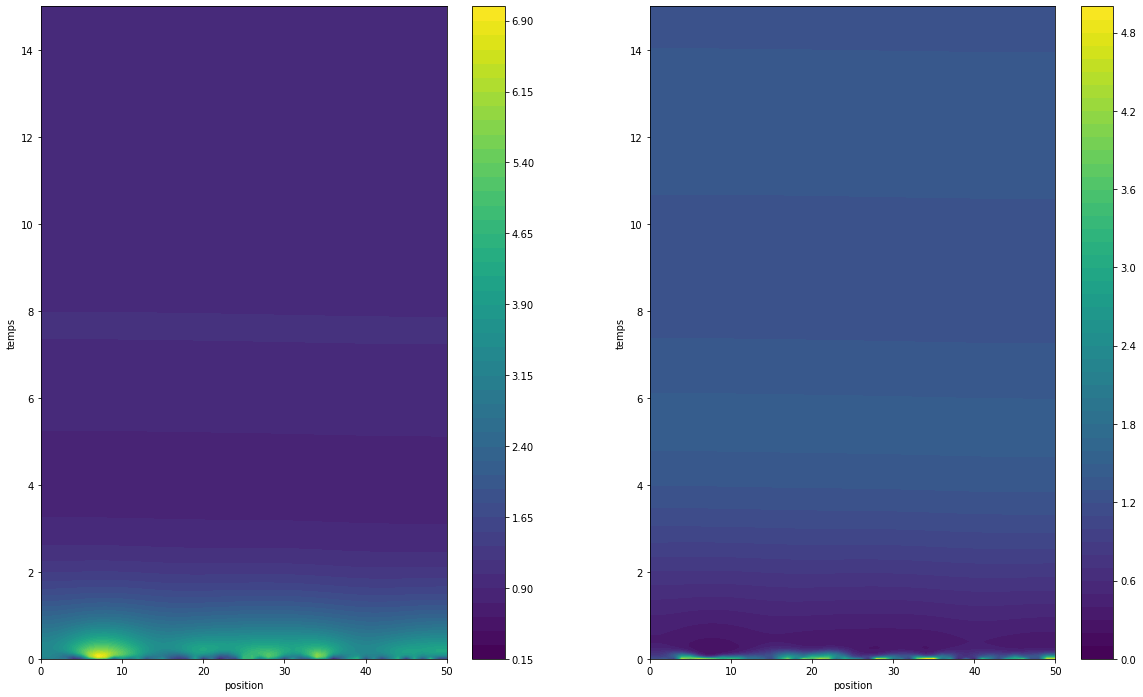

In [88]:
fig3_3 = plt.figure(figsize=(20,12))
[xx,tt] = np.meshgrid(x,np.linspace(0,time,T+1))
ax1 = plt.subplot(121)
ax1.set_xlabel("position")
ax1.set_ylabel("temps")
graphe_1 = plt.contourf(xx,tt,np.transpose(u),50)
fig3_3.colorbar(graphe_1,ax=ax1)
ax2 = plt.subplot(122)
ax2.set_xlabel("position")
ax2.set_ylabel("temps")
graphe_2 = plt.contourf(xx,tt,np.transpose(v),50)
fig3_3.colorbar(graphe_2,ax=ax2)
plt.show()

Encore une fois, nous avons une situation similaire au cas en 0D. Le système varie jusqu'à atteindre un équilibre.